# KDE: Kernel Density Estimation

- Estimate density function based on data samples

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In order to compre the result of KDE, let's draw samples from a well-known distribution $N(0,1)$.

In [2]:
data = stats.norm(loc=0, scale=1).rvs(10)

In [131]:
def draw_density(model, N=10, xl=-3, xu=3, kde_func=None):
    data = model.rvs(N)
    if xl > data.min(): xl = data.min()
    if xu < data.max(): xu = data.max()
    
    x = np.linspace(xl, xu, 200)
    density = stats.gaussian_kde(data)
    dvalues = density(x)

    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    ax[0].plot(x, dvalues, label='KDE')
    ax[0].scatter(data, np.zeros_like(data), alpha=.5)
    ax[0].set_title('density plots')
    ax[0].plot(x, model.pdf(x), label='math model')
    if kde_func is not None:
        kde_density = kde_func(data)
        ax[0].plot(x, kde_density(x), label='kde function')
    ax[0].legend()
    ax[1].hist(data, density=True, range=(xl,xu))

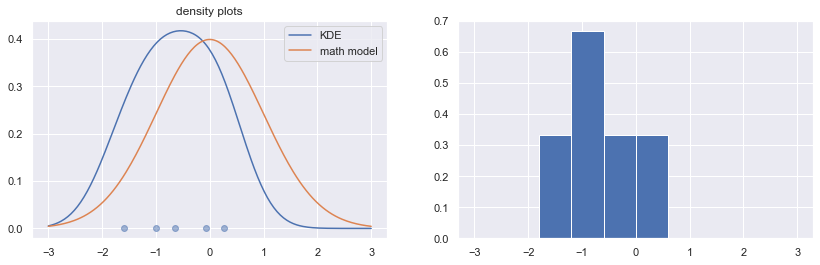

In [132]:
draw_density(stats.norm(loc=0, scale=1), N=5)

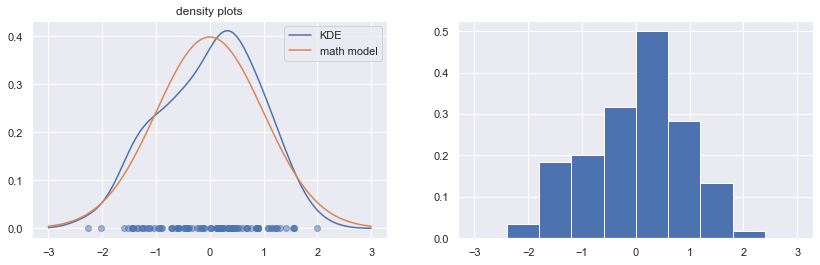

In [133]:
draw_density(stats.norm(loc=0, scale=1), N=100)

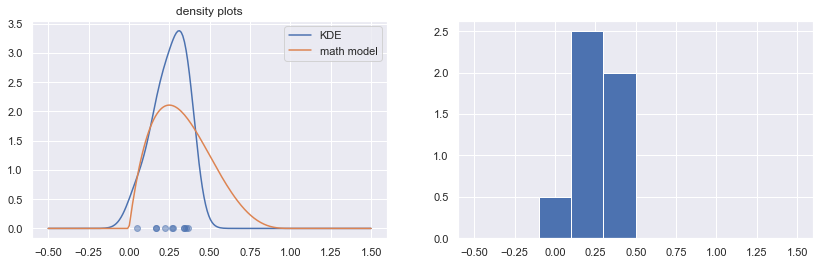

In [134]:
draw_density(stats.beta(2,4), xl=-.5, xu=1.5)

## A Simple implementation of KDE

In [182]:
class gaussian_kde():
    def __init__(self, data, bw=.15):
        self.gs = [stats.norm(loc=d, scale=bw) for d in data]
        self.bw = bw
    def __call__(self, x):
        y = np.zeros_like(x)
        for g in self.gs:
            y += g.pdf(x)
        y /= len(self.gs)
        return y
#

In [169]:
data = stats.norm(loc=0, scale=1).rvs(20)
gdensity  = gaussian_kde(data)

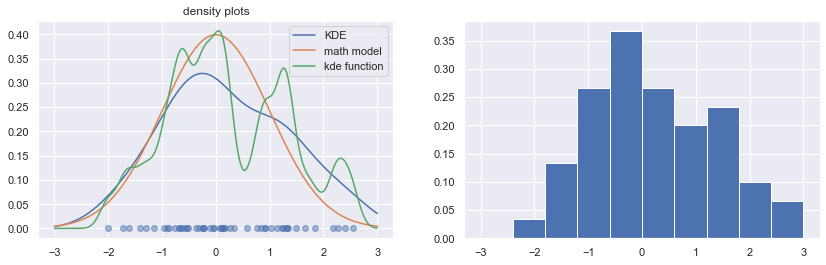

In [189]:
draw_density(stats.norm(loc=0, scale=1), N=50, kde_func=gaussian_kde)

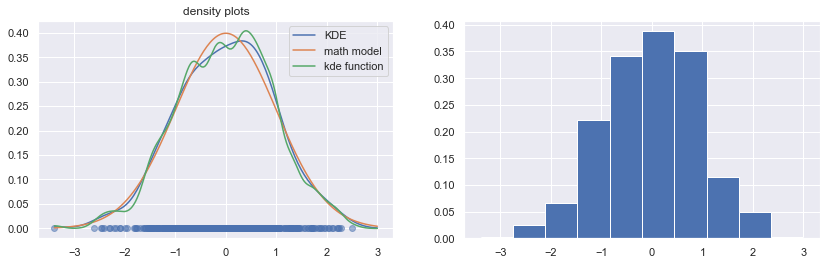

In [190]:
draw_density(stats.norm(loc=0, scale=1), N=500, kde_func=gaussian_kde)